# GSEApy Analysis

### 1. Import Required Packages
### 2. Import GSEA Data
### 3. Plot Data


## <br> 1. Import Required Packages

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import gseapy as gp

Set figure parameters.

In [17]:
sc.set_figure_params(figsize=(6,6))
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
pd.options.display.max_colwidth = 200
#plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 'truetype'

## <br> 2. Import GSEA Data

In [133]:
GSEA_Master = pd.read_csv('./GSEApy_Data/GSEA_Master.txt', sep='\t', index_col=0)

GSEA_Master['Time'] = GSEA_Master['Time'].astype('category')
GSEA_Master['Term'] = GSEA_Master['Term'].str.replace('_Ensembl', '')
GSEA_Master['Gene %'] = GSEA_Master['Gene %'].str.replace('%', '').astype(float)



# Create a mapping dictionary for Time to X_COOR values
time_mapping = {2: 1, 4: 2, 8: 3, 12: 4, 18: 5, 24: 6, 72: 7}

# Map the Time values to X_COOR using the mapping dictionary
GSEA_Master['X_COOR'] = GSEA_Master['Time'].map(time_mapping)


In [134]:
GSEA_Master

Name   
0       gsea  \
1       gsea   
2       gsea   
3       gsea   
4       gsea   
...      ...   
413113  gsea   
413114  gsea   
413115  gsea   
413116  gsea   
413117  gsea   

                                                                            Term   
0                                                  KEGG_MM_TRYPTOPHAN_METABOLISM  \
1                                      GO_BP_MM_CHOLESTEROL_BIOSYNTHETIC_PROCESS   
2       WIKIPATHWAYS_MM_NUCLEAR_RECEPTORS_IN_LIPID_METABOLISM_AND_TOXICITY-WP299   
3                 BIOCARTA_MM_NUCLEAR_RECEPTORS_IN_LIPID_METABOLISM_AND_TOXICITY   
4                                                              TZ_SCS_CENTRALHEP   
...                                                                          ...   
413113                       GO_BP_MM_POSITIVE_REGULATION_OF_JUN_KINASE_ACTIVITY   
413114                                      GO_CC_MM_RECYCLING_ENDOSOME_MEMBRANE   
413115                                MPO_MM_ABNORMAL_PRIMITIVE_STREAK_FORMATION   
413116                                       GO_MF_MM_POTASSIUM_CHANNEL_ACTIVITY   
413117                                               SMPDB_MM_HYPOACETYLASPARTIA   

              ES       NES  NOM p-val  FDR q-val  FWER p-val    Tag %  Gene %   
0      -0.633982 -2.501622   0.000000   0.002273       0.003     5/32    1.94  \
1       0.695538  2.389591   0.000000   0.006162       0.005    12/23   14.41   
2      -0.681056 -2.363876   0.000000   0.001768       0.007     9/26    6.85   
3      -0.681056 -2.363876   0.000000   0.001768       0.007     9/26    6.85   
4      -0.477989 -2.346232   0.000000   0.001326       0.007  219/460   27.28   
...          ...       ...        ...        ...         ...      ...     ...   
413113  0.139702  0.463578   0.995633   1.000000       1.000    23/23   94.83   
413114 -0.127424 -0.441874   0.997980   0.999139       1.000    11/21   61.00   
413115  0.125241  0.434810   1.000000   1.000000       1.000    22/22   96.50   
413116  0.135616  0.399939   1.000000   1.000000       1.000    18/18   93.20   
413117  0.122005  0.399900   0.998020   0.999806       1.000    18/18   89.22   

                                                                                                                                                                                                     Lead_genes   
0                                                                                                                                                                                 Cyp1a2;Cyp1a1;Tdo2;Kyat3;Aox3  \
1                                                                                                                                       Insig2;Apoa1;Lss;Hmgcs1;Dhcr7;Cyp51;Nsdhl;Ebp;Prkaa1;Hmgcs2;Dhcr24;Fdps   
2                                                                                                                                                        Cyp1a2;Nr1i3;Ppara;Abcd2;Abcb4;Nr1h4;Rarg;Abcb1a;Abcc2   
3                                                                                                                                                        Cyp1a2;Nr1i3;Ppara;Abcd2;Abcb4;Nr1h4;Rarg;Abcb1a;Abcc2   
4       Cyp1a2;Tiparp;Lmo7;Selenbp1;Lrp4;Cyp1a1;Fmo3;Nfe2l2;Reln;Fbp1;Wipf3;Cyb5a;Htatip2;Stard13;Tnfaip8l1;Cpeb4;Hpgd;Nr1i3;Myo1b;Gclc;Deptor;Il1r1;Esrrg;Cped1;2900026A02Rik;Ces1c;Ugdh;Etnk2;Ppara;Rnf217...   
...                                                                                                                                                                                                         ...   
413113                                                       Il1rn;Magi3;Wnt5a;Mapk8ip3;Dvl2;Zeb2;Pak1;Dvl3;Tnfrsf11a;Map3k10;Map3k1;Vangl2;Traf2;Irak1;Map3k11;Map3k7;Traf6;Axin1;Fzd8;Dab2ip;Taok3;Fzd4;Ptk2b   
413114                                                                                                                                 Scamp1;Ndr

In [135]:
subset = GSEA_Master[GSEA_Master['Term'].str.contains('KEGG')]

In [136]:
subset

Name                                               Term        ES   
0       gsea                      KEGG_MM_TRYPTOPHAN_METABOLISM -0.633982  \
40      gsea        KEGG_MM_COMPLEMENT_AND_COAGULATION_CASCADES  0.442134   
73      gsea        KEGG_MM_ANTIGEN_PROCESSING_AND_PRESENTATION  0.444800   
112     gsea                         KEGG_MM_RETINOL_METABOLISM -0.430182   
154     gsea                          KEGG_MM_VIRAL_MYOCARDITIS  0.389629   
...      ...                                                ...       ...   
412902  gsea                          KEGG_MM_COCAINE_ADDICTION  0.188211   
412947  gsea    KEGG_MM_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM -0.190308   
412981  gsea                         KEGG_MM_TASTE_TRANSDUCTION -0.219314   
412984  gsea                    KEGG_MM_SPHINGOLIPID_METABOLISM -0.181174   
413046  gsea  KEGG_MM_SNARE_INTERACTIONS_IN_VESICULAR_TRANSPORT -0.156912   

             NES  NOM p-val  FDR q-val  FWER p-val  Tag %  Gene %   
0      -2.501622   0.000000   0.002273       0.003   5/32    1.94  \
40      1.995588   0.000000   0.113085       0.647  34/60   31.06   
73      1.874133   0.003929   0.201329       0.930  27/49   38.65   
112    -1.788235   0.000000   0.181621       0.991  25/58   30.51   
154     1.733048   0.010776   0.276706       0.998  25/52   36.48   
...          ...        ...        ...         ...    ...     ...   
412902  0.708234   0.914097   1.000000       1.000  34/34   91.83   
412947 -0.685756   0.888889   0.935860       1.000  13/23   57.61   
412981 -0.659432   0.944990   0.953370       1.000  11/16   51.37   
412984 -0.657171   0.955466   0.954516       1.000  18/34   47.46   
413046 -0.600096   0.973832   0.979760       1.000  17/32   51.96   

                                                                                                                                                                                                     Lead_genes   
0                                                                                                                                                                                 Cyp1a2;Cyp1a1;Tdo2;Kyat3;Aox3  \
40                         Fga;Fgb;Cfh;C3;Kng1;Fgg;Pros1;C9;Serpina1e;Kng2;Cd55;Cpb2;C8g;C1qc;Hc;Serpina1c;Serping1;Cd46;Mbl1;C1qb;C4bp;F2;Serpina1a;Cr2;Plg;Cd55b;Serpind1;C8a;C1qa;F13b;Cd59a;Serpinc1;C6;C8b   
73                                      Ctsl;Psme3;H2-Ab1;Cd74;Nfyc;H2-DMb1;Hspa2;Hspa5;Ctss;Hspa4;Hsp90ab1;Rfx5;Tap2;Nfyb;Hspa1b;H2-Q7;H2-Eb1;Ciita;Rfxap;Tap1;H2-Q10;H2-Aa;H2-D1;H2-T24;Hsp90aa1;Ifi30;H2-T22   
112                           Cyp1a2;Cyp1a1;Hsd17b6;Retsat;Cyp2a4;Cyp2a5;Cyp2b13;Lrat;Cyp26c1;Ugt2b5;Ugt1a10;Cyp3a11;Adh1;Dhrs3;Cyp2b9;Cyp4a31;Cyp4a12a;Dhrs4;Ugt2b35;Aldh1a1;Rdh5;Aldh1a7;Adh5;Ugt1a7c;Cyp2c50   
154                                                        Myh9;H2-Ab1;Cd55;Actb;H2-DMb1;Myh14;Sgcd;Abl2;Casp8;Sgcb;Itgb2l;H2-Q7;Eif4g2;H2-Eb1;Cd55b;H2-Q10;H2-Aa;H2-D1;Icam1;Rac1;Cxadr;Rac2;Fyn;Eif4g3;H2-T24   
...                                                                                                                                                                                                         ...   
412902  Ddc;Creb3l2;Creb5;Grin2a;Fosb;Maob;Bdnf;Creb3l1;Atf4;Prkx;Slc18a2;Jun;Dlg4;Grin2b;Slc18a1;Atf2;Gnai3;Gpsm1;Creb3l3;Atf6b;Gnas;Prkacb;Rela;Nfkb1;Prkaca;Grin2d;Gnai2;Cdk5;Creb1;Cdk5r1;Creb3;Maoa;Rgs...   
412947                                                                                                                                         Acat2;Mdh2;Cat;Mdh1;Mcee;Grhpr;Pccb;Cs;Glul;Shmt2;Aco2;Gcsh;Agxt   
412981                                                                                                                                    Scnn1a;Adcy8;Kcnb1;Tas1r1;Prkaca;Gnb1;Prkacb;Plcb2;Itpr3;Gnas;Cacna1a   
412984                                                                                                   Plpp3;Smpd1;Smpd4;Neu1;Asah1;Glb1;Ugcg;

In [148]:
subset['Term'] = subset['Term'].str.replace('^KEGG_MM_', '', regex=True)
subset['Size'] = subset['Gene %'].apply(lambda x: 300 if x == 100 else 10 + (x / 100) * 290)


/tmp/local/16879529/ipykernel_22087/1790418140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Term'] = subset['Term'].str.replace('^KEGG_MM_', '', regex=True)
/tmp/local/16879529/ipykernel_22087/1790418140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Size'] = subset['Gene %'].apply(lambda x: 300 if x == 100 else 10 + (x / 100) * 290)


In [149]:
subset

Name                                       Term        ES       NES   
0       gsea                      TRYPTOPHAN_METABOLISM -0.633982 -2.501622  \
40      gsea        COMPLEMENT_AND_COAGULATION_CASCADES  0.442134  1.995588   
73      gsea        ANTIGEN_PROCESSING_AND_PRESENTATION  0.444800  1.874133   
112     gsea                         RETINOL_METABOLISM -0.430182 -1.788235   
154     gsea                          VIRAL_MYOCARDITIS  0.389629  1.733048   
...      ...                                        ...       ...       ...   
412902  gsea                          COCAINE_ADDICTION  0.188211  0.708234   
412947  gsea    GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM -0.190308 -0.685756   
412981  gsea                         TASTE_TRANSDUCTION -0.219314 -0.659432   
412984  gsea                    SPHINGOLIPID_METABOLISM -0.181174 -0.657171   
413046  gsea  SNARE_INTERACTIONS_IN_VESICULAR_TRANSPORT -0.156912 -0.600096   

        NOM p-val  FDR q-val  FWER p-val  Tag %  Gene %   
0        0.000000   0.002273       0.003   5/32    1.94  \
40       0.000000   0.113085       0.647  34/60   31.06   
73       0.003929   0.201329       0.930  27/49   38.65   
112      0.000000   0.181621       0.991  25/58   30.51   
154      0.010776   0.276706       0.998  25/52   36.48   
...           ...        ...         ...    ...     ...   
412902   0.914097   1.000000       1.000  34/34   91.83   
412947   0.888889   0.935860       1.000  13/23   57.61   
412981   0.944990   0.953370       1.000  11/16   51.37   
412984   0.955466   0.954516       1.000  18/34   47.46   
413046   0.973832   0.979760       1.000  17/32   51.96   

                                                                                                                                                                                                     Lead_genes   
0                                                                                                                                                                                 Cyp1a2;Cyp1a1;Tdo2;Kyat3;Aox3  \
40                         Fga;Fgb;Cfh;C3;Kng1;Fgg;Pros1;C9;Serpina1e;Kng2;Cd55;Cpb2;C8g;C1qc;Hc;Serpina1c;Serping1;Cd46;Mbl1;C1qb;C4bp;F2;Serpina1a;Cr2;Plg;Cd55b;Serpind1;C8a;C1qa;F13b;Cd59a;Serpinc1;C6;C8b   
73                                      Ctsl;Psme3;H2-Ab1;Cd74;Nfyc;H2-DMb1;Hspa2;Hspa5;Ctss;Hspa4;Hsp90ab1;Rfx5;Tap2;Nfyb;Hspa1b;H2-Q7;H2-Eb1;Ciita;Rfxap;Tap1;H2-Q10;H2-Aa;H2-D1;H2-T24;Hsp90aa1;Ifi30;H2-T22   
112                           Cyp1a2;Cyp1a1;Hsd17b6;Retsat;Cyp2a4;Cyp2a5;Cyp2b13;Lrat;Cyp26c1;Ugt2b5;Ugt1a10;Cyp3a11;Adh1;Dhrs3;Cyp2b9;Cyp4a31;Cyp4a12a;Dhrs4;Ugt2b35;Aldh1a1;Rdh5;Aldh1a7;Adh5;Ugt1a7c;Cyp2c50   
154                                                        Myh9;H2-Ab1;Cd55;Actb;H2-DMb1;Myh14;Sgcd;Abl2;Casp8;Sgcb;Itgb2l;H2-Q7;Eif4g2;H2-Eb1;Cd55b;H2-Q10;H2-Aa;H2-D1;Icam1;Rac1;Cxadr;Rac2;Fyn;Eif4g3;H2-T24   
...                                                                                                                                                                                                         ...   
412902  Ddc;Creb3l2;Creb5;Grin2a;Fosb;Maob;Bdnf;Creb3l1;Atf4;Prkx;Slc18a2;Jun;Dlg4;Grin2b;Slc18a1;Atf2;Gnai3;Gpsm1;Creb3l3;Atf6b;Gnas;Prkacb;Rela;Nfkb1;Prkaca;Grin2d;Gnai2;Cdk5;Creb1;Cdk5r1;Creb3;Maoa;Rgs...   
412947                                                                                                                                         Acat2;Mdh2;Cat;Mdh1;Mcee;Grhpr;Pccb;Cs;Glul;Shmt2;Aco2;Gcsh;Agxt   
412981                                                                                                                                    Scnn1a;Adcy8;Kcnb1;Tas1r1;Prkaca;Gnb1;Prkacb;Plcb2;Itpr3;Gnas;Cacna1a   
412984                                                                                                   Plpp3;Smpd1;Smpd4;Neu1;Asah1;Glb1;Ugcg;Sgms2;Gba;Sgpp2;Plpp2;Sptlc2;Cerk;Sgms1;Asah2;Degs1;Plpp1;Sgpl1   
413046                       

## <br> 3. Plot Data

/tmp/local/16879529/ipykernel_22087/3113910074.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Celltype'] = pd.Categorical(subset['Celltype'], categories=celltype_order, ordered=True)
/tmp/local/16879529/ipykernel_22087/3113910074.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Time'] = pd.Categorical(subset['Time'], categories=time_order, ordered=True)


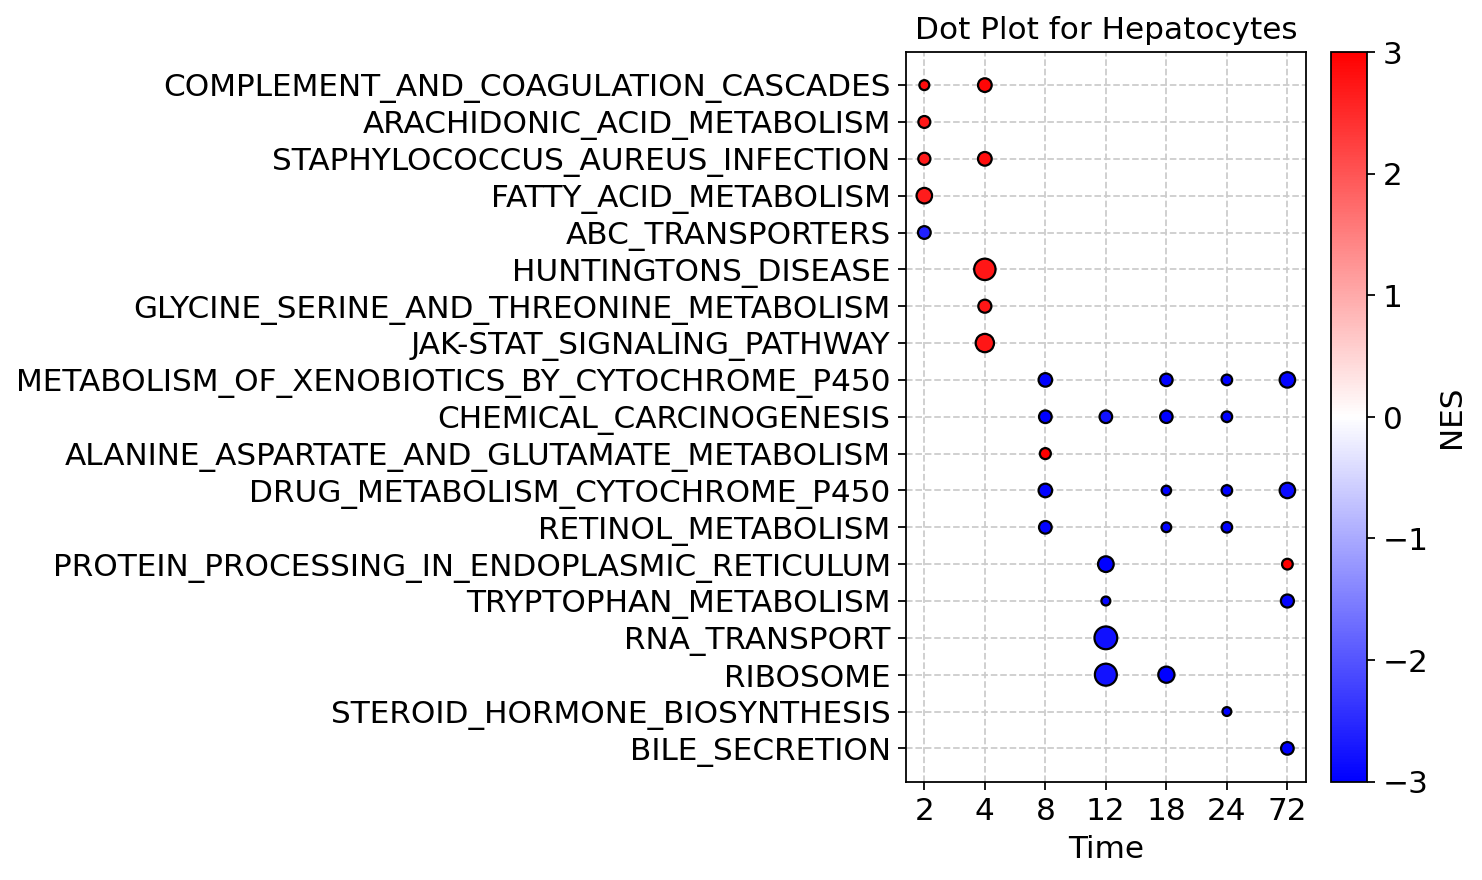

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the desired order of cell types and times
celltype_order = ['Hepatocyte', 'LSEC', 'HSC', 'Macrophage', 'B_Cell', 'T_Cell', 'PF', 'Cholangiocyte', 'Neutrophil', 'pDC']
time_order = [2, 4, 8, 12, 18, 24, 72]

# Convert 'Celltype' column to categorical with the desired order
subset['Celltype'] = pd.Categorical(subset['Celltype'], categories=celltype_order, ordered=True)

# Convert 'Time' column to categorical with the desired order
subset['Time'] = pd.Categorical(subset['Time'], categories=time_order, ordered=True)

# Filter subset for the 'Hepatocyte' cell type
hepatocyte_subset = subset[subset['Celltype'] == 'Hepatocyte']

# Initialize an empty DataFrame to store the top terms
top_terms = pd.DataFrame()

# Iterate over each time point
for time in time_order:
    # Filter the hepatocyte_subset for the current time point
    time_subset = hepatocyte_subset[hepatocyte_subset['Time'] == time]
    
    # Select the lowest five 'FWER p-val' values
    top_five_terms = time_subset.nsmallest(5, 'FWER p-val')
    
    # Concatenate the top_five_terms to the top_terms DataFrame
    top_terms = pd.concat([top_terms, top_five_terms])

# Assign the 'Xcoordinate' values based on the time categories
top_terms['Xcoordinate'] = [time_order.index(time) + 1 for time in top_terms['Time']]

# Define the custom color gradient
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create the dot plot
plt.figure(figsize=(4, 6))
plt.scatter(top_terms['Xcoordinate'], top_terms['Term'], s=top_terms['Size'], zorder=10, edgecolors='black', c=top_terms['NES'], cmap=cmap, vmin=-3, vmax=3)

# Set the tick positions and labels on the x-axis
plt.xticks(range(1, len(time_order) + 1), time_order)

plt.xlabel('Time')
plt.ylabel('')
plt.title('Dot Plot for Hepatocytes')

# Reverse the y-axis ticks
plt.gca().invert_yaxis()

# Add gridlines in the background with lower zorder
plt.grid(axis='x', linestyle='dashed', zorder=5)
plt.grid(axis='y', linestyle='dashed', zorder=5)

# Add a colorbar to show the mapping of 'NES' values to colors
cbar = plt.colorbar()
cbar.set_label('NES')

plt.show()


/tmp/local/16879529/ipykernel_22087/1210940332.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Celltype'] = pd.Categorical(subset['Celltype'], categories=celltype_order, ordered=True)
/tmp/local/16879529/ipykernel_22087/1210940332.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Time'] = pd.Categorical(subset['Time'], categories=time_order, ordered=True)


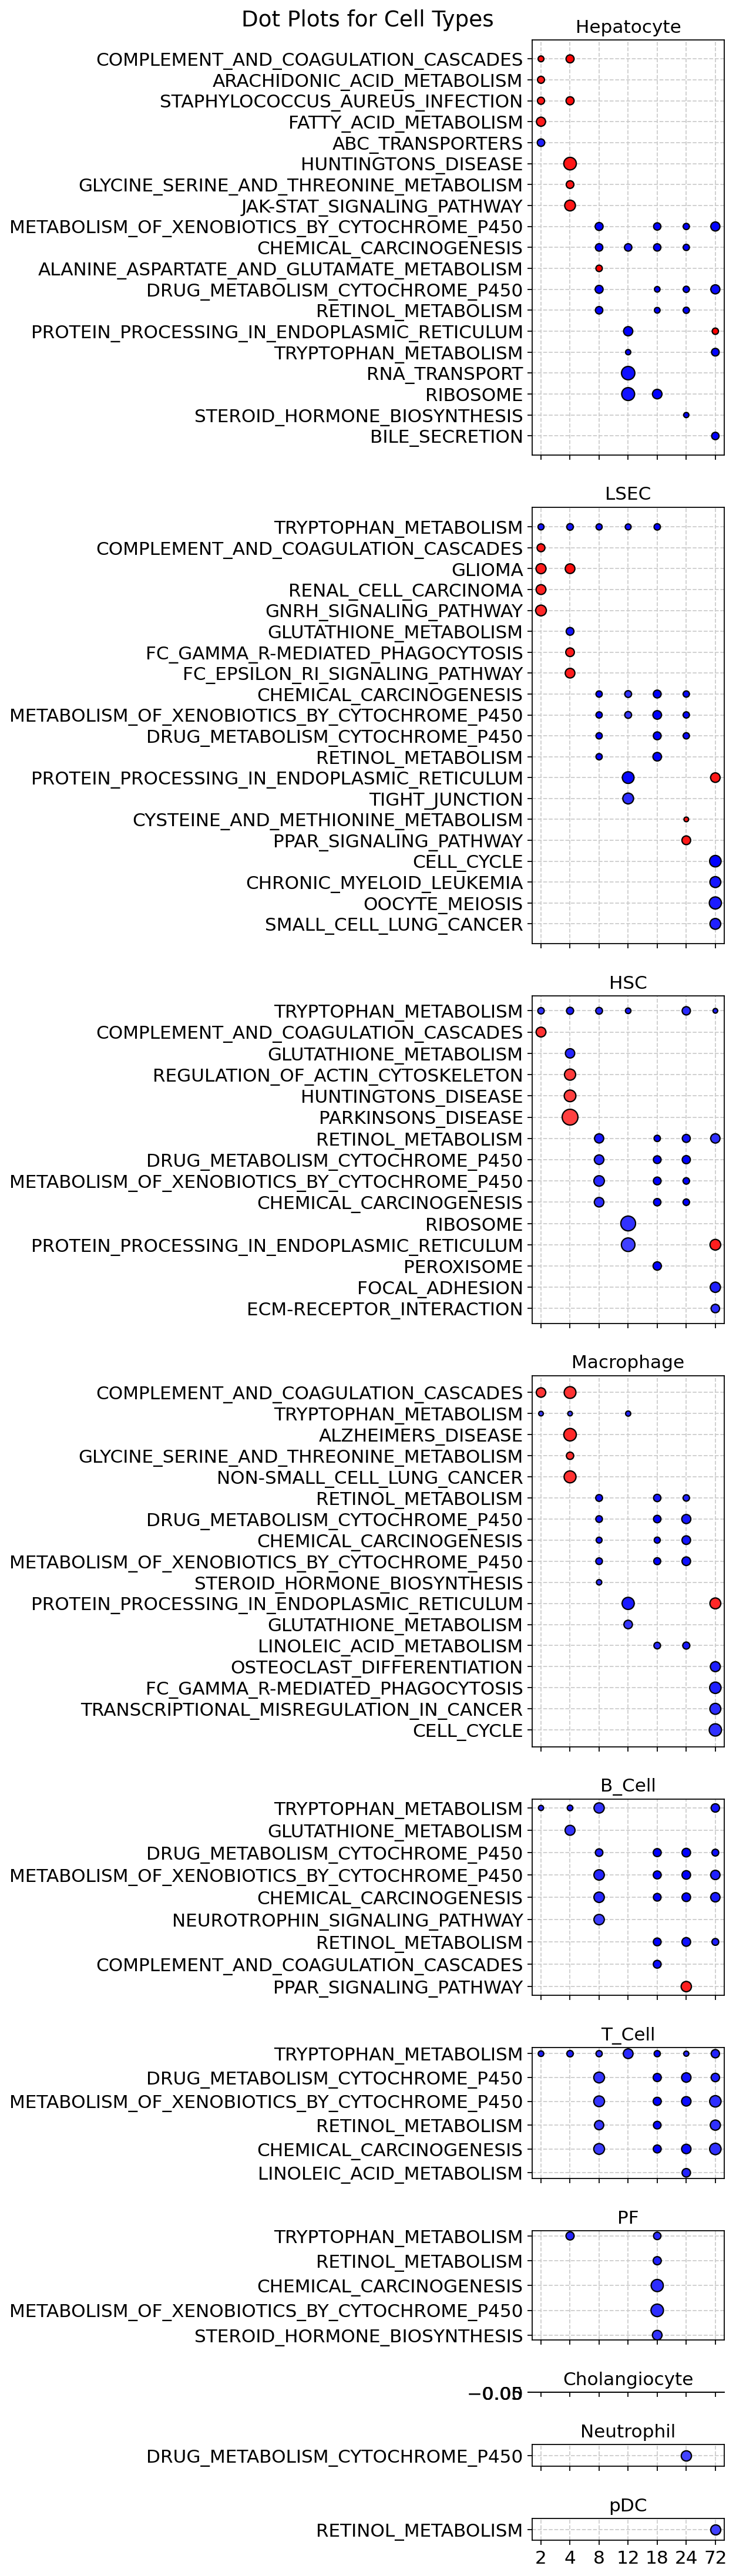

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the desired order of cell types and times
celltype_order = ['Hepatocyte', 'LSEC', 'HSC', 'Macrophage', 'B_Cell', 'T_Cell', 'PF', 'Cholangiocyte', 'Neutrophil', 'pDC']
time_order = [2, 4, 8, 12, 18, 24, 72]

# Convert 'Celltype' column to categorical with the desired order
subset['Celltype'] = pd.Categorical(subset['Celltype'], categories=celltype_order, ordered=True)

# Convert 'Time' column to categorical with the desired order
subset['Time'] = pd.Categorical(subset['Time'], categories=time_order, ordered=True)

# Determine the number of terms for each cell type
term_counts = []
for cell_type in celltype_order:
    cell_type_subset = subset[subset['Celltype'] == cell_type]
    top_terms = pd.DataFrame()
    for time in time_order:
        time_subset = cell_type_subset[(cell_type_subset['Time'] == time) & (cell_type_subset['FWER p-val'] <= 0.05)]
        top_terms = pd.concat([top_terms, time_subset.nsmallest(5, 'FWER p-val')]).drop_duplicates(subset=['Term'], keep='first')

    term_counts.append(len(top_terms))
    
# Calculate the height ratios based on term counts
max_terms = max(term_counts)
height_ratios = [count / max_terms for count in term_counts]

# Initialize the grid for subplots
fig, axes = plt.subplots(len(celltype_order), 1, figsize=(8, 2.8 * len(celltype_order)), sharex=True, gridspec_kw={'height_ratios': height_ratios})

# Iterate over each cell type
for i, cell_type in enumerate(celltype_order):
    # Filter subset for the current cell type
    cell_type_subset = subset[subset['Celltype'] == cell_type]

    # Initialize an empty DataFrame to store the top terms
    top_terms = pd.DataFrame()

    # Iterate over each time point
    for time in time_order:
        # Filter the cell_type_subset for the current time point and 'FWER p-val' <= 0.05
        time_subset = cell_type_subset[(cell_type_subset['Time'] == time) & (cell_type_subset['FWER p-val'] <= 0.05)]

        # Select the lowest five 'FWER p-val' values
        top_five_terms = time_subset.nsmallest(5, 'FWER p-val')

        # Concatenate the top_five_terms to the top_terms DataFrame
        top_terms = pd.concat([top_terms, top_five_terms])

    # Assign the 'Xcoordinate' values based on the time categories
    top_terms['Xcoordinate'] = [time_order.index(time) + 1 for time in top_terms['Time']]

    # Define the custom color gradient
    colors = ['blue', 'white', 'red']
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

    # Create the dot plot in the current subplot
    ax = axes[i]
    ax.scatter(top_terms['Xcoordinate'], top_terms['Term'], s=top_terms['Size'], zorder=10, edgecolors='black', c=top_terms['NES'], cmap=cmap, vmin=-3, vmax=3)

    # Set the tick positions and labels on the x-axis
    ax.set_xticks(range(1, len(time_order) + 1))
    ax.set_xticklabels(time_order)

    # Set the title of the subplot
    ax.set_title(cell_type)

    # Reverse the y-axis ticks
    ax.invert_yaxis()

    # Add gridlines in the background with lower zorder
    ax.grid(axis='x', linestyle='dashed', zorder=5)
    ax.grid(axis='y', linestyle='dashed', zorder=5)

# Set the overall title for the figure
fig.suptitle('Dot Plots for Cell Types')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('./Figures/GSEA_DotPlot.pdf', bbox_inches='tight')

# Show the figure
plt.show()


/tmp/local/16879529/ipykernel_22087/2312647538.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Celltype'] = pd.Categorical(subset['Celltype'], categories=celltype_order, ordered=True)
/tmp/local/16879529/ipykernel_22087/2312647538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Time'] = pd.Categorical(subset['Time'], categories=time_order, ordered=True)


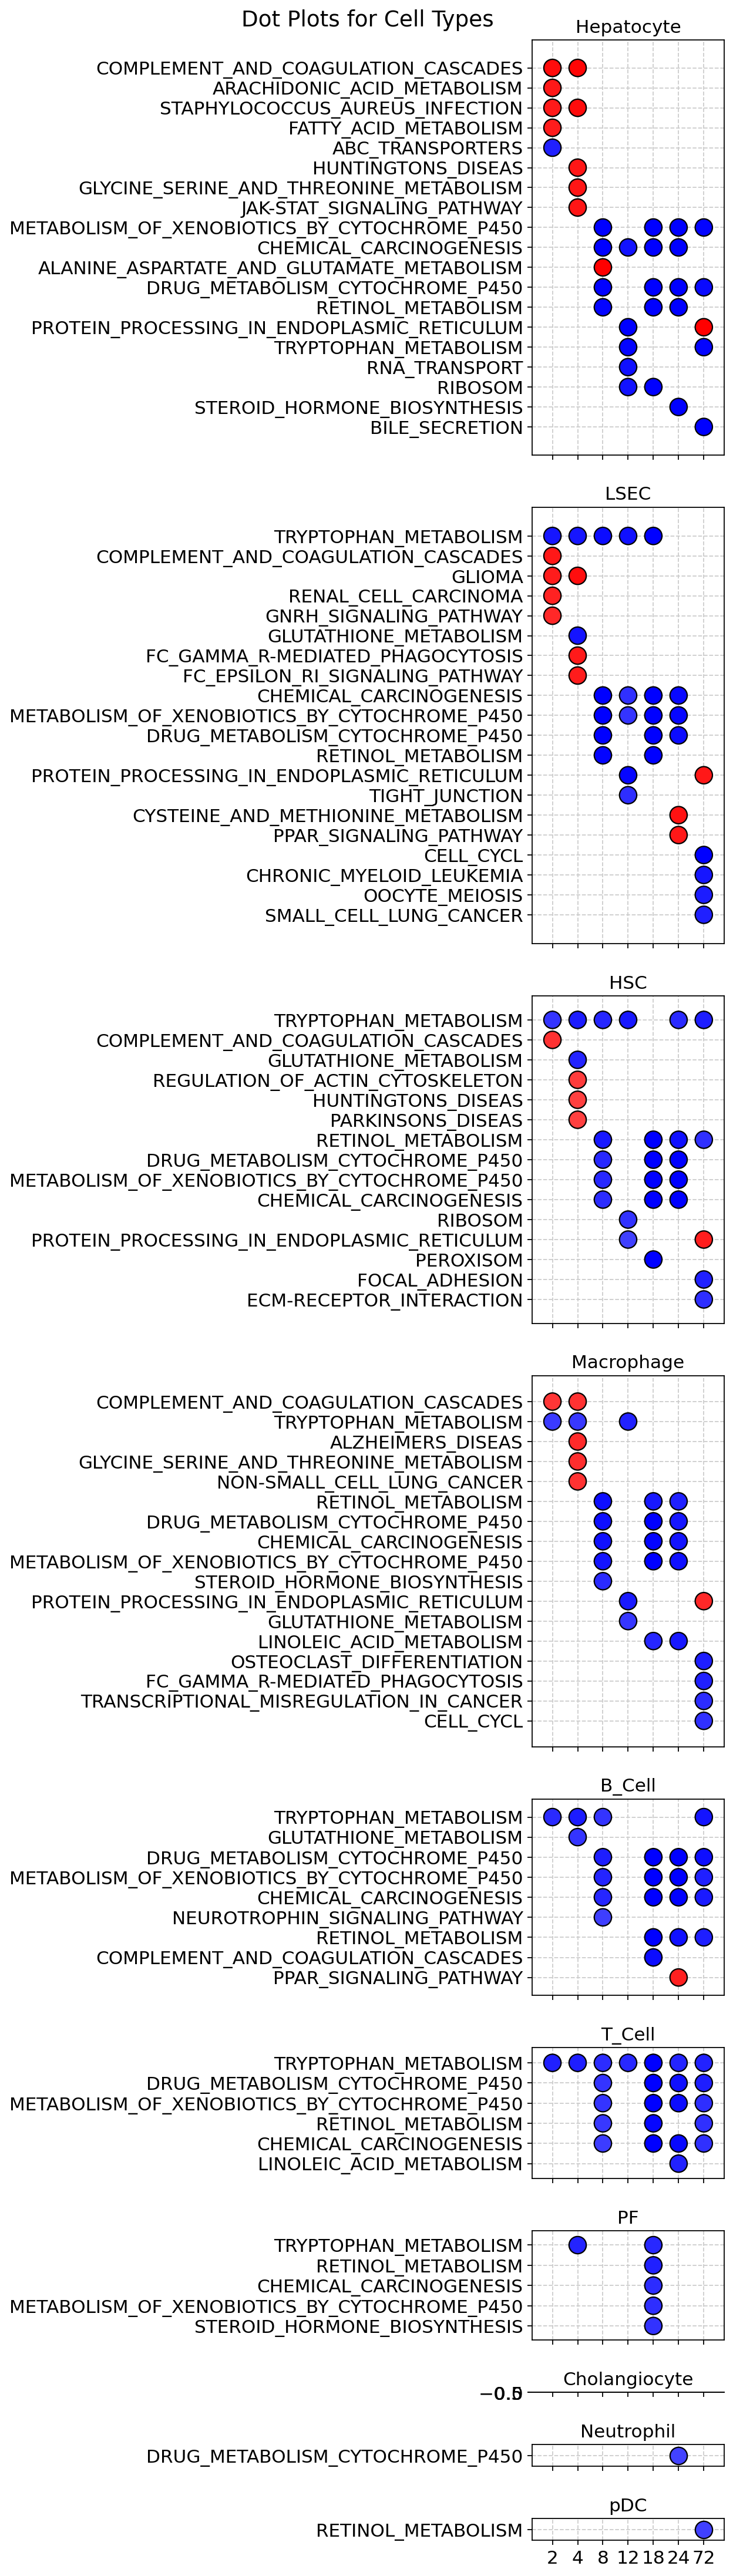

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the desired order of cell types and times
celltype_order = ['Hepatocyte', 'LSEC', 'HSC', 'Macrophage', 'B_Cell', 'T_Cell', 'PF', 'Cholangiocyte', 'Neutrophil', 'pDC']
time_order = [2, 4, 8, 12, 18, 24, 72]

# Convert 'Celltype' column to categorical with the desired order
subset['Celltype'] = pd.Categorical(subset['Celltype'], categories=celltype_order, ordered=True)

# Convert 'Time' column to categorical with the desired order
subset['Time'] = pd.Categorical(subset['Time'], categories=time_order, ordered=True)

# Determine the number of terms for each cell type
term_counts = []
for cell_type in celltype_order:
    cell_type_subset = subset[subset['Celltype'] == cell_type]
    top_terms = pd.DataFrame()
    for time in time_order:
        time_subset = cell_type_subset[(cell_type_subset['Time'] == time) & (cell_type_subset['FWER p-val'] <= 0.05)]
        top_terms = pd.concat([top_terms, time_subset.nsmallest(5, 'FWER p-val')]).drop_duplicates(subset=['Term'], keep='first')

    term_counts.append(len(top_terms))

# Calculate the height ratios based on term counts
max_terms = max(term_counts)
height_ratios = [count / max_terms for count in term_counts]

# Initialize the grid for subplots
fig, axes = plt.subplots(len(celltype_order), 1, figsize=(8, 2.8 * len(celltype_order)), sharex=True, gridspec_kw={'height_ratios': height_ratios})

# Iterate over each cell type
for i, cell_type in enumerate(celltype_order):
    # Filter subset for the current cell type
    cell_type_subset = subset[subset['Celltype'] == cell_type]

    # Initialize an empty DataFrame to store the top terms
    top_terms = pd.DataFrame()

    # Iterate over each time point
    for time in time_order:
        # Filter the cell_type_subset for the current time point and 'FWER p-val' <= 0.05
        time_subset = cell_type_subset[(cell_type_subset['Time'] == time) & (cell_type_subset['FWER p-val'] <= 0.05)]

        # Select the lowest five 'FWER p-val' values
        top_five_terms = time_subset.nsmallest(5, 'FWER p-val')

        # Concatenate the top_five_terms to the top_terms DataFrame
        top_terms = pd.concat([top_terms, top_five_terms])

    # Assign the 'Xcoordinate' values based on the time categories
    top_terms['Xcoordinate'] = [time_order.index(time) + 1 for time in top_terms['Time']]

    # Define the custom color gradient
    colors = ['blue', 'white', 'red']
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

    # Create the dot plot in the current subplot
    ax = axes[i]
    ax.scatter(top_terms['Xcoordinate'], top_terms['Term'], s=top_terms['Size'], zorder=10, edgecolors='black', c=top_terms['NES'], cmap=cmap, vmin=-3, vmax=3)

    # Set the tick positions and labels on the x-axis
    ax.set_xticks(range(1, len(time_order) + 1))
    ax.set_xticklabels(time_order)

    # Set the title of the subplot
    ax.set_title(cell_type)

    # Reverse the y-axis ticks
    ax.invert_yaxis()

    # Add gridlines in the background with lower zorder
    ax.grid(axis='x', linestyle='dashed', zorder=5)
    ax.grid(axis='y', linestyle='dashed', zorder=5)
    
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin + 0.5, ymax - 0.5)

    xmin, xmax = ax.get_xlim()
    ax.set_xlim(xmin - 0.05, xmax + 0.05)    

    
    
# Set the overall title for the figure
fig.suptitle('Dot Plots for Cell Types')

# Adjust the spacing between subplots
plt.tight_layout()


# Save the plot as a PDF file
plt.savefig('./Figures/GSEA_DotPlot.pdf', bbox_inches='tight')

# Show the figure
plt.show()


/tmp/local/16879529/ipykernel_22087/35197404.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Celltype'] = pd.Categorical(subset['Celltype'], categories=celltype_order, ordered=True)
/tmp/local/16879529/ipykernel_22087/35197404.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Time'] = pd.Categorical(subset['Time'], categories=time_order, ordered=True)


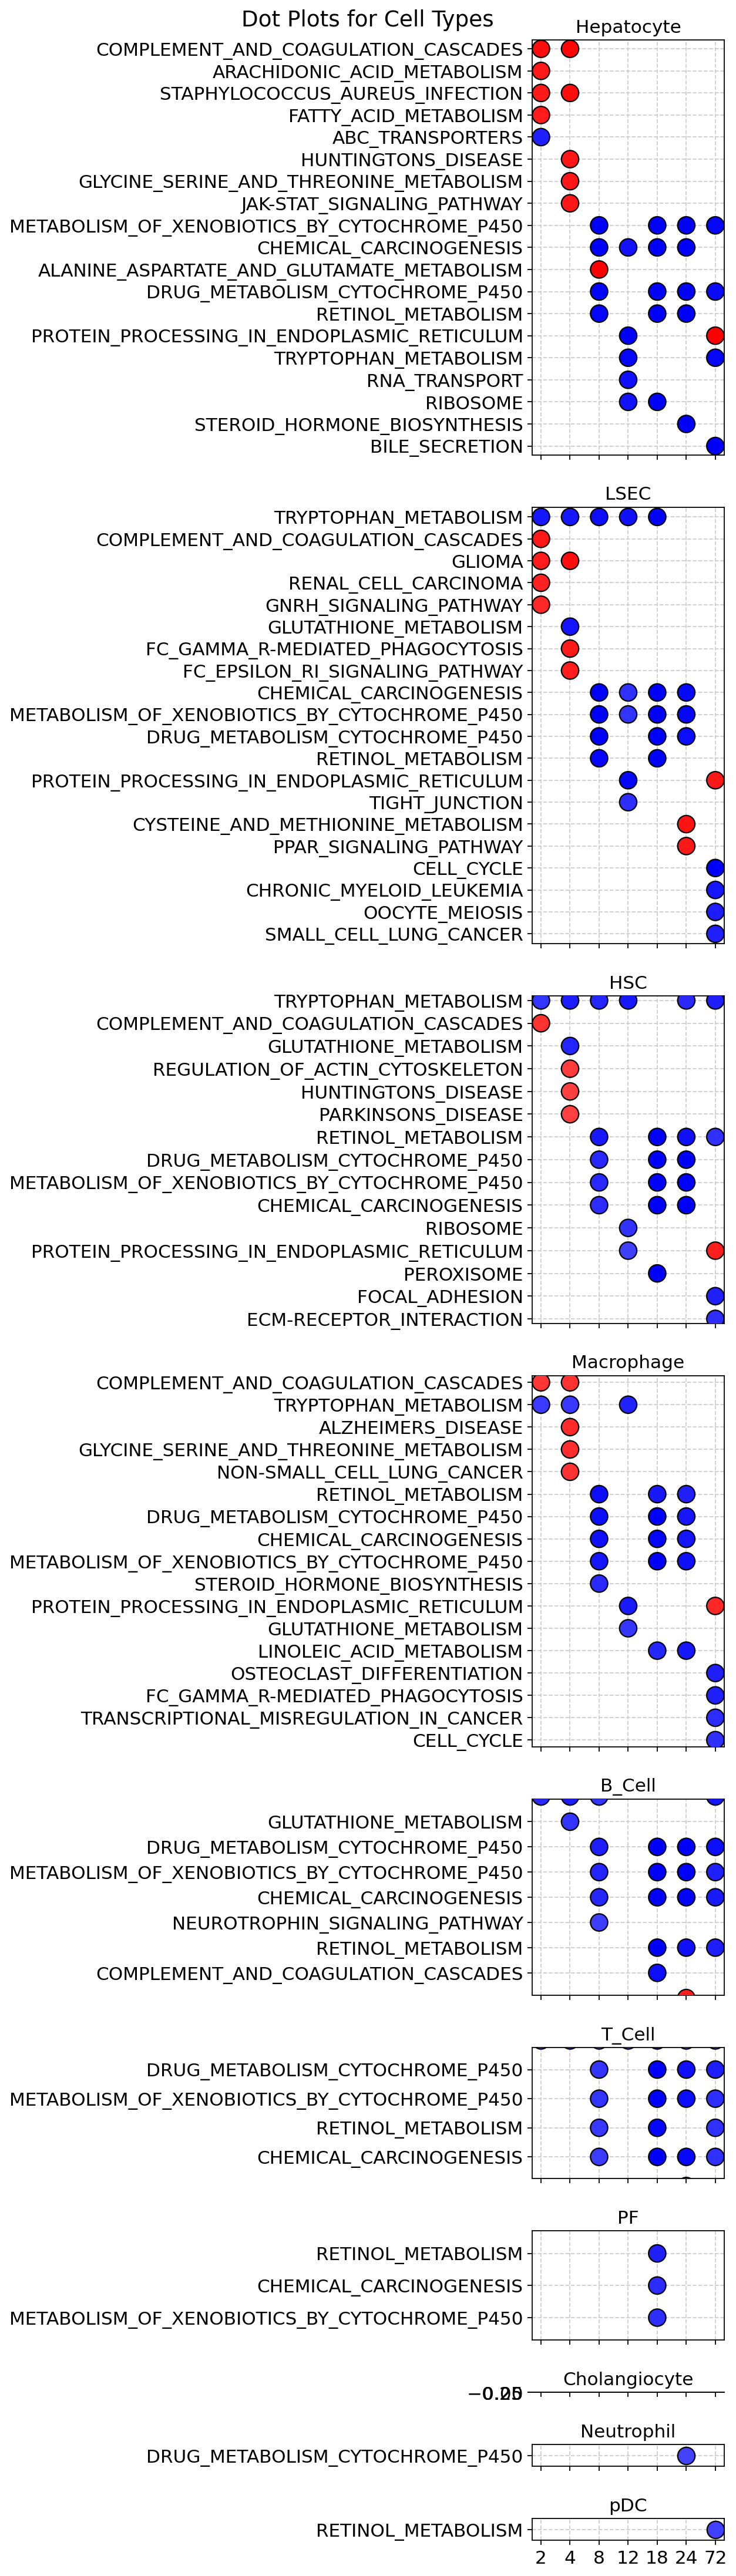

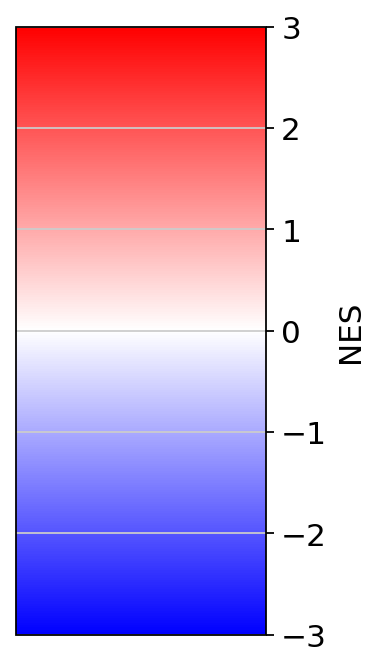

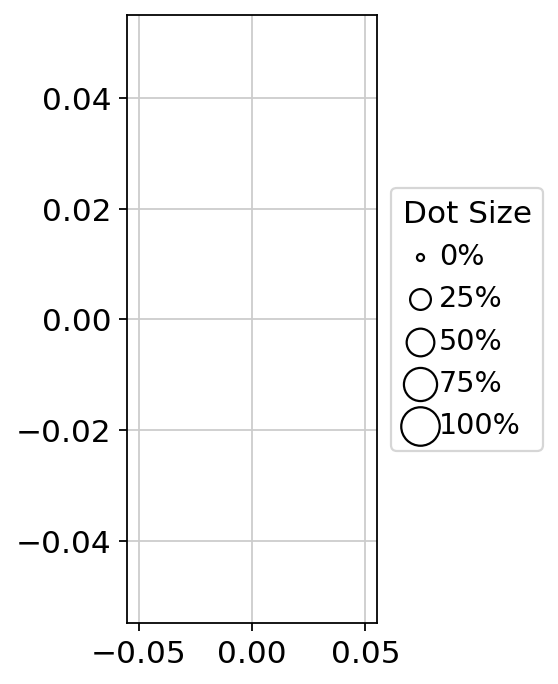

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the desired order of cell types and times
celltype_order = ['Hepatocyte', 'LSEC', 'HSC', 'Macrophage', 'B_Cell', 'T_Cell', 'PF', 'Cholangiocyte', 'Neutrophil', 'pDC']
time_order = [2, 4, 8, 12, 18, 24, 72]

# Convert 'Celltype' column to categorical with the desired order
subset['Celltype'] = pd.Categorical(subset['Celltype'], categories=celltype_order, ordered=True)

# Convert 'Time' column to categorical with the desired order
subset['Time'] = pd.Categorical(subset['Time'], categories=time_order, ordered=True)

# Determine the number of terms for each cell type
term_counts = []
for cell_type in celltype_order:
    cell_type_subset = subset[subset['Celltype'] == cell_type]
    top_terms = pd.DataFrame()
    for time in time_order:
        time_subset = cell_type_subset[(cell_type_subset['Time'] == time) & (cell_type_subset['FWER p-val'] <= 0.05)]
        top_terms = pd.concat([top_terms, time_subset.nsmallest(5, 'FWER p-val')]).drop_duplicates(subset=['Term'], keep='first')

    term_counts.append(len(top_terms))

# Calculate the height ratios based on term counts
max_terms = max(term_counts)
height_ratios = [count / max_terms for count in term_counts]

# Initialize the grid for subplots
fig, axes = plt.subplots(len(celltype_order), 1, figsize=(8, 2.8 * len(celltype_order)), sharex=True, gridspec_kw={'height_ratios': height_ratios})

# Iterate over each cell type
for i, cell_type in enumerate(celltype_order):
    # Filter subset for the current cell type
    cell_type_subset = subset[subset['Celltype'] == cell_type]

    # Initialize an empty DataFrame to store the top terms
    top_terms = pd.DataFrame()

    # Iterate over each time point
    for time in time_order:
        # Filter the cell_type_subset for the current time point and 'FWER p-val' <= 0.05
        time_subset = cell_type_subset[(cell_type_subset['Time'] == time) & (cell_type_subset['FWER p-val'] <= 0.05)]

        # Select the lowest five 'FWER p-val' values
        top_five_terms = time_subset.nsmallest(5, 'FWER p-val')

        # Concatenate the top_five_terms to the top_terms DataFrame
        top_terms = pd.concat([top_terms, top_five_terms])

    # Assign the 'Xcoordinate' values based on the time categories
    top_terms['Xcoordinate'] = [time_order.index(time) + 1 for time in top_terms['Time']]

    # Define the custom color gradient
    colors = ['blue', 'white', 'red']
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

    # Create the dot plot in the current subplot
    ax = axes[i]
    ax.scatter(top_terms['Xcoordinate'], top_terms['Term'], s=175, zorder=10, edgecolors='black', c=top_terms['NES'], cmap=cmap, vmin=-3, vmax=3)

    # Set the tick positions and labels on the x-axis
    ax.set_xticks(range(1, len(time_order) + 1))
    ax.set_xticklabels(time_order)

    # Set the title of the subplot
    ax.set_title(cell_type)

    # Reverse the y-axis ticks
    ax.invert_yaxis()

    # Add padding to the ylim
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.5, ymax + 0.5)

    # Add gridlines in the background with lower zorder
    ax.grid(axis='x', linestyle='dashed', zorder=5)
    ax.grid(axis='y', linestyle='dashed', zorder=5)

# Set the overall title for the figure
fig.suptitle('Dot Plots for Cell Types')

# Adjust the spacing between subplots
plt.tight_layout()

# Create a separate color bar figure
fig_cb = plt.figure(figsize=(2, 5))
ax_cb = fig_cb.add_subplot(111)

# Plot the color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-3, vmax=3)), cax=ax_cb)
cbar.set_label('NES')

# Save the plot as a PDF file
plt.savefig('./Figures/GSEA_DotPlot_Colorbar.pdf', bbox_inches='tight')



# Create a separate color bar figure
fig_ds = plt.figure(figsize=(2, 5))
ax_ds = fig_ds.add_subplot(111)

## Create a custom legend for dot sizes
dot_sizes = [10, 87.5, 155, 222.5, 300]
legend_sizes = [plt.scatter([], [], s=size, edgecolors='black', color='white') for size in dot_sizes]
legend_labels = ['0%', '25%', '50%', '75%', '100%']
plt.legend(legend_sizes, legend_labels, title='Dot Size', scatterpoints=1, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('./Figures/GSEA_DotPlot_DotSizes.pdf', bbox_inches='tight')
# Show the figures
plt.show()
